# **OpenAI**


In [1]:
import openai

OPENAI_API_KEY = open("/home/plsek/Documents/Keys/openai.txt").read().strip("\n")
openai.api_key = OPENAI_API_KEY

In [2]:
[i["id"] for i in openai.Model.list()["data"]]

['babbage',
 'davinci',
 'text-davinci-edit-001',
 'babbage-code-search-code',
 'text-similarity-babbage-001',
 'code-davinci-edit-001',
 'text-davinci-001',
 'ada',
 'babbage-code-search-text',
 'babbage-similarity',
 'code-search-babbage-text-001',
 'text-curie-001',
 'code-search-babbage-code-001',
 'text-ada-001',
 'text-embedding-ada-002',
 'text-similarity-ada-001',
 'curie-instruct-beta',
 'gpt-4',
 'ada-code-search-code',
 'ada-similarity',
 'code-search-ada-text-001',
 'text-search-ada-query-001',
 'davinci-search-document',
 'gpt-4-0314',
 'ada-code-search-text',
 'text-search-ada-doc-001',
 'davinci-instruct-beta',
 'gpt-3.5-turbo',
 'text-similarity-curie-001',
 'code-search-ada-code-001',
 'ada-search-query',
 'text-search-davinci-query-001',
 'curie-search-query',
 'gpt-3.5-turbo-0301',
 'davinci-search-query',
 'babbage-search-document',
 'ada-search-document',
 'text-search-curie-query-001',
 'whisper-1',
 'text-search-babbage-doc-001',
 'curie-search-document',
 'text-

## **Model comparison**

In [9]:
question = "What is the distance of NGC4649?"

In [6]:
%time completion = openai.ChatCompletion.create(model="gpt-3.5-turbo", messages=[{"role":"user","content":question}])
print(completion.choices[0].message.content)

CPU times: user 1.78 ms, sys: 809 µs, total: 2.59 ms
Wall time: 2.54 s
NGC 4649, also known as M60, is a galaxy that is approximately 55 million light years away from Earth.


In [7]:
%time completion = openai.ChatCompletion.create(model="gpt-4", messages=[{"role":"user","content":question}])
print(completion.choices[0].message.content)

CPU times: user 1.8 ms, sys: 982 µs, total: 2.78 ms
Wall time: 8.86 s
NGC 4649, also known as Messier 60, is an elliptical galaxy located approximately 55 million light-years away from Earth in the constellation Virgo.


## **GPT 3.5 examples**

In [ ]:
question = input(">")

completion = openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=[{"role":"user","content":question}]
)

reply_content = completion.choices[0].message.content

print()
print(reply_content)
print()

In [44]:
completion = openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=[{"role":"user","content":"Generate python code that generates 1000 random numbers and plots a histogram."}]
)

reply_content = completion.choices[0].message.content

print(reply_content)

Here's an example code to generate 1000 random numbers and plot a histogram using Python:

```python
import random
import matplotlib.pyplot as plt

# Generate 1000 random numbers
random_numbers = [random.randint(0, 100) for i in range(1000)]

# Plot histogram
plt.hist(random_numbers, bins=10)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of 1000 Random Numbers')
plt.show()
```

Explanation:

- First, we import the `random` module and `matplotlib.pyplot` module. 
- We then generate a list of 1000 random integers between 0 and 100 using a list comprehension and the `randint()` function from the `random` module.
- Finally, we plot a histogram of the generated numbers using the `hist()` function from `matplotlib`. The `bins` parameter specifies the number of bins on the x-axis, and the `xlabel`, `ylabel`, and `title` functions add labels to the plot. The `show()` function displays the plot.


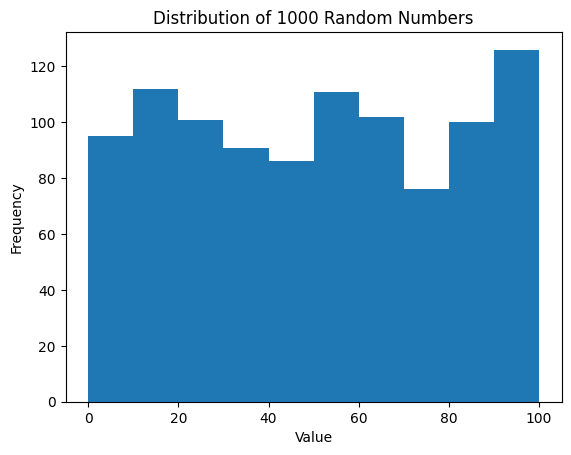

In [45]:
import random
import matplotlib.pyplot as plt

# Generate 1000 random numbers
random_numbers = [random.randint(0, 100) for i in range(1000)]

# Plot histogram
plt.hist(random_numbers, bins=10)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of 1000 Random Numbers')
plt.show()

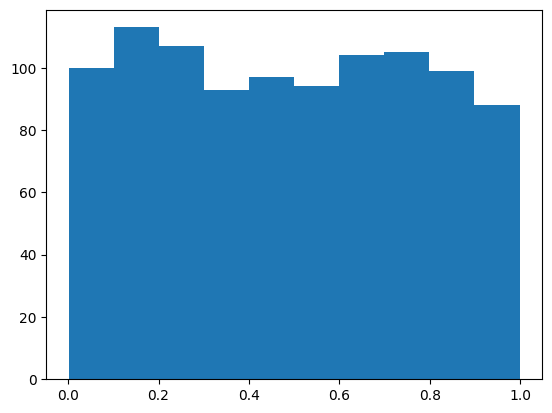

In [46]:
completion = openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=[{"role":"user","content":"Generate python code that generates 1000 random numbers and plots a histogram. Print only the code."}]
)

reply_content = completion.choices[0].message.content

for s in ["```", "```python"]:
    reply_content = reply_content.strip(s)

exec(reply_content)

## **Chatbot**

In [4]:
import panel as pn  # GUI
pn.extension()

In [10]:
def collect_messages(_):
    prompt = inp.value_input
    inp.value = ''
    context.append({'role':'user', 'content':f"{prompt}"})
    response = get_completion_from_messages(context) 
    context.append({'role':'assistant', 'content':f"{response}"})
    panels.append(
        pn.Row('User:', pn.pane.Markdown(prompt, width=600)))
    panels.append(
        pn.Row('Assistant:', pn.pane.Markdown(response, width=600, style={'background-color': '#F6F6F6'})))
 
    return pn.Column(*panels)

def get_completion_from_messages(messages, model="gpt-3.5-turbo", temperature=0):
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=temperature, # this is the degree of randomness of the model's output
    )
#     print(str(response.choices[0].message))
    return response.choices[0].message["content"]

In [9]:
panels = [] # collect display 

context = [ {'role':'system', 'content': 'Act like a scientific assistant providing accurate information.'}]

inp = pn.widgets.TextInput(value="Hi", placeholder='Enter text here…')
button_conversation = pn.widgets.Button(name="Chat!")

interactive_conversation = pn.bind(collect_messages, button_conversation)

dashboard = pn.Column(
    inp,
    pn.Row(button_conversation),
    pn.panel(interactive_conversation, loading_indicator=True, height=300),
)

dashboard

Column
    [0] TextInput(placeholder='Enter text here…')
    [1] Row
        [0] Button(name='Chat!')
    [2] ParamFunction(function, _pane=Column, height=300, loading_indicator=True)

## **Embeddings**

In [27]:
res = openai.Embedding.create(
  model="text-embedding-ada-002",
  input="The food was terrible by the way."
)

In [28]:
import numpy as np

vals = res["data"][0]["embedding"]
np.mean(vals), np.std(vals)

(-0.0006989153836725048, 0.02550594322993562)

## **DALL-E**

In [34]:
response = openai.Image.create(
  prompt="Two coliding spiral galaxies",
  n=1,
  size="512x512"
)
image_url = response['data'][0]['url']

image_url

'https://oaidalleapiprodscus.blob.core.windows.net/private/org-Nqe44yrsRozhWHqkp9GacRfV/user-C4hiVzzby68nsYBv9sr6Bvcq/img-wklTVyP3M2MFlQfUwooPM46Y.png?st=2023-04-18T16%3A42%3A54Z&se=2023-04-18T18%3A42%3A54Z&sp=r&sv=2021-08-06&sr=b&rscd=inline&rsct=image/png&skoid=6aaadede-4fb3-4698-a8f6-684d7786b067&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2023-04-18T15%3A18%3A31Z&ske=2023-04-19T15%3A18%3A31Z&sks=b&skv=2021-08-06&sig=81xs28o1znd/drlePGqfyh%2BbnVGuQIv37dhZdWdA1w8%3D'

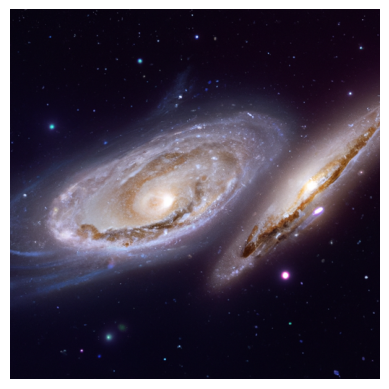

In [36]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

response = requests.get(image_url)
image = Image.open(BytesIO(response.content))

plt.imshow(image)
plt.axis('off')
plt.show()

## **Whisper**

In [1]:
import speech_recognition as sr

# obtain audio from the microphone
r = sr.Recognizer()
with sr.Microphone() as source:
    print("Say something!")
    r.adjust_for_ambient_noise(source)
    audio = r.listen(source) #, timeout=5)
    # audio = r.record(source, duration=3)

ALSA lib pcm.c:2666:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.front
ALSA lib pcm.c:2666:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.rear
ALSA lib pcm.c:2666:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.center_lfe
ALSA lib pcm.c:2666:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.side
ALSA lib pcm.c:2666:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.surround21
ALSA lib pcm.c:2666:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.surround21
ALSA lib pcm.c:2666:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.surround40
ALSA lib pcm.c:2666:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.surround41
ALSA lib pcm.c:2666:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.surround50
ALSA lib pcm.c:2666:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.surround51
ALSA lib pcm.c:2666:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.surround71
ALSA lib pcm.c:2666:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.iec958
ALSA lib pcm.c:2666:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.iec958
ALSA lib pcm.c:2666:(snd

Say something!


In [5]:
question = r.recognize_whisper_api(audio, api_key=OPENAI_API_KEY)
# question = r.recognize_whisper(audio, language="english")

print(question)

What's the distance of NGC 4649?


In [6]:
completion = openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=[{"role":"user","content":question}]
)

reply_content = completion.choices[0].message.content.strip("\n")

print(reply_content)

NGC 4649 (also known as M60) is a galaxy that is located about 55 million light-years away from Earth.


In [7]:
import os
from gtts import gTTS

audio = gTTS(text=reply_content, lang="en", slow=False)
audio.save("reply.mp3")
_ = os.system("cvlc --rate 1.3 --play-and-exit reply.mp3")
os.system("rm reply.mp3")

[00005648f394d6d0] dummy interface: using the dummy interface module...
[00005648f3907ea0] main playlist: end of playlist, exiting


0

## **Data analysis**

In [1]:
import os
import openai
import pandas as pd

OPENAI_API_KEY = open("/home/plsek/Documents/Keys/openai.txt").read().strip("\n")
openai.api_key = OPENAI_API_KEY

history = [{"role":"system","content":"You are a helpful assistant"}]

def ask_gpt():
    question = input("> ")
    
    history.append({"role":"user","content":question})
    
    # Ask GPT-4 for an answer
    completion = openai.ChatCompletion.create(
        model="gpt-4",
        messages=history
    )
    reply_content = completion.choices[0].message.content.strip("\n")

    # Add the answer to the history
    history.append({"role":"assistant","content":reply_content})

    print()
    print(reply_content)

In [ ]:
ask_gpt()

In [24]:
history = [{"role":"system","content":"You are a helpful assistant"}]

data = pd.read_csv("sdss_photo.csv").round(1)[:5].to_string()
question = f'Generate Python code that looks for trends and visualizes data of following structure:\n\n"""\n{data}\n"""'

history.append({"role":"user","content":question})

# Ask GPT-4 for an answer
completion = openai.ChatCompletion.create(
    model="gpt-4",
    messages=history
)
reply_content = completion.choices[0].message.content.strip("\n")

# Add the answer to the history
history.append({"role":"assistant","content":reply_content})

print()
print(reply_content)


To analyze and visualize data of the given structure, you can use Python libraries such as pandas, seaborn, and matplotlib. Here is the Python code to look for trends and visualize the data.

```python
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Input data
data = """u,g,r,i,z,target
19.2,17.5,16.8,16.6,16.5,star
19.7,18.3,17.8,17.6,17.5,star
16.1,15.2,14.9,14.8,14.8,star
19.0,18.2,17.9,17.7,17.8,star
19.0,18.1,17.8,17.7,17.7,star
"""

# Load data into pandas DataFrame
df = pd.read_csv(pd.StringIO(data))

# Look for trends using pairplot
sns.pairplot(df, hue='target')
plt.show()

# Visualize data distribution
sns.set(style="whitegrid")
attributes = ['u', 'g', 'r', 'i', 'z']
for attribute in attributes:
    sns.boxplot(x='target', y=attribute, data=df)
    plt.title(f'{attribute.upper()} Distribution for Stars')
    plt.show()

```

This script first reads the data into a pandas DataFrame, then uses seaborn's `pairplot` function to create a scatterplot m

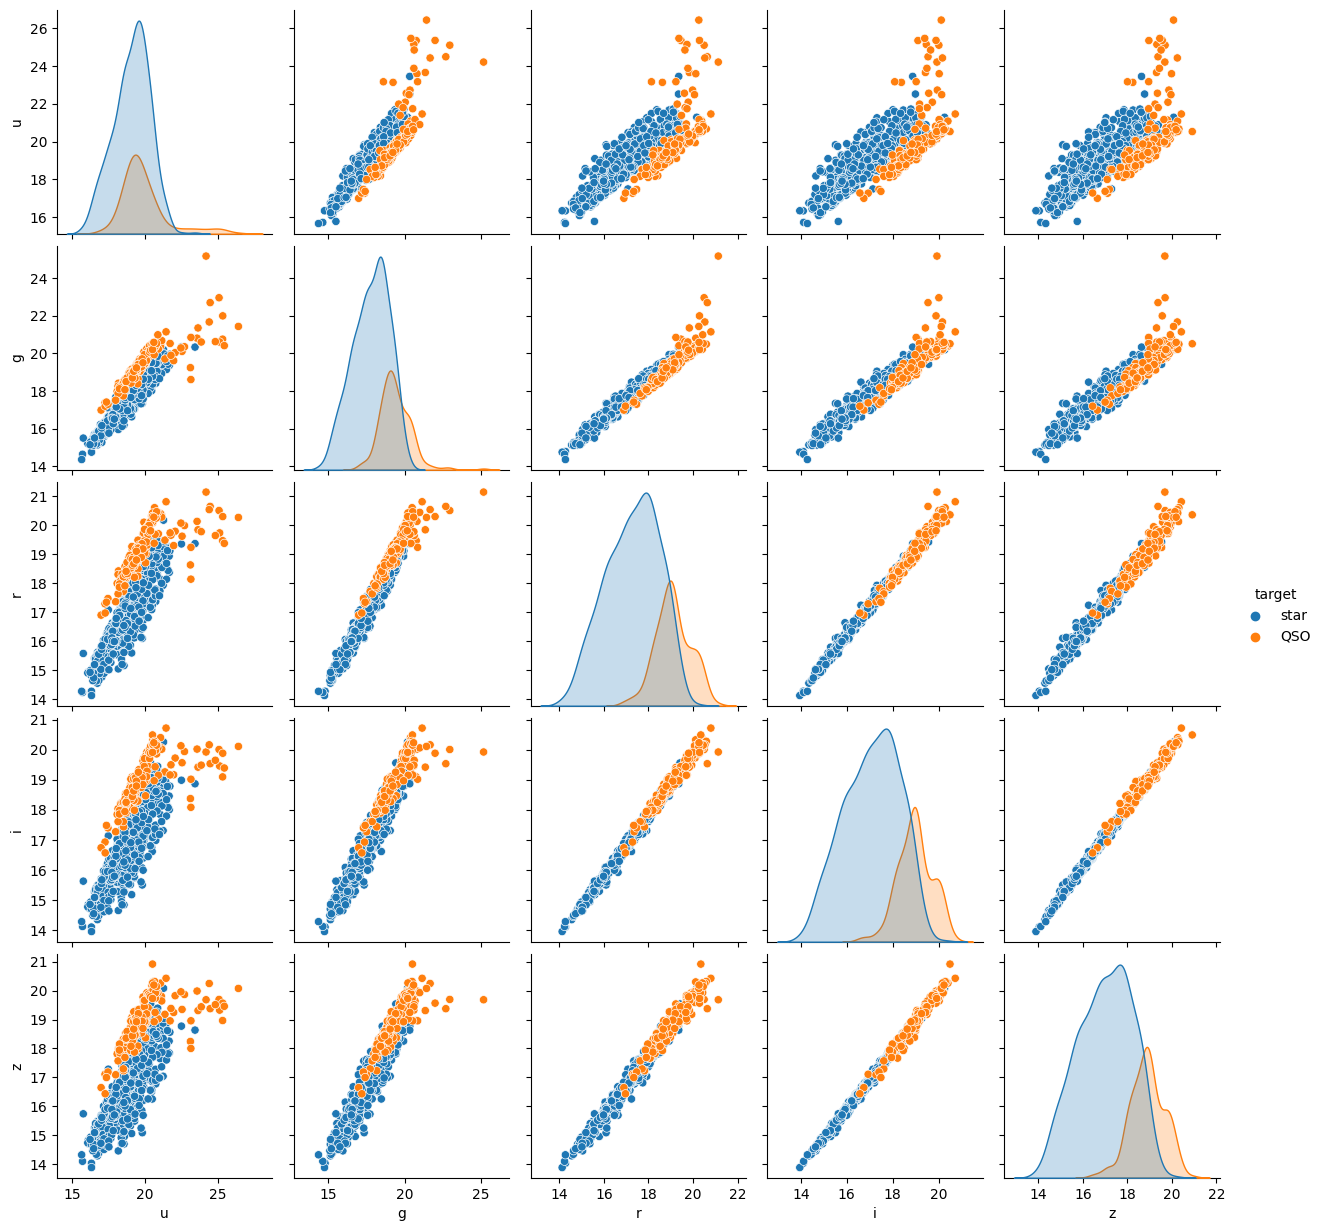

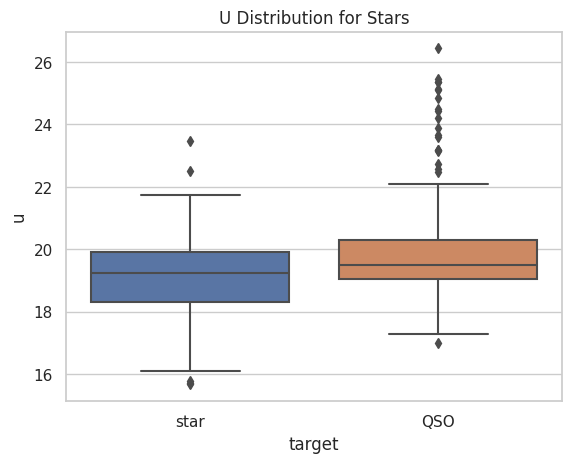

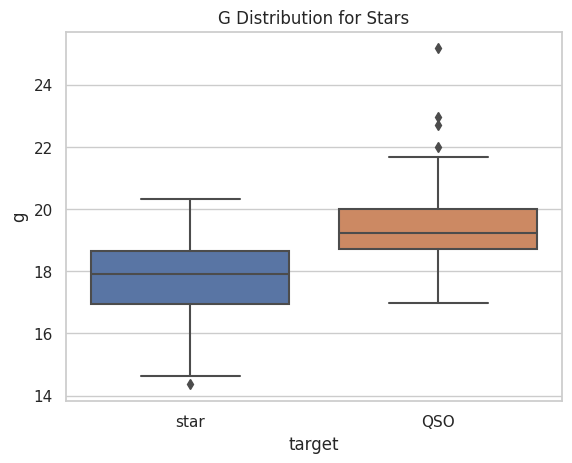

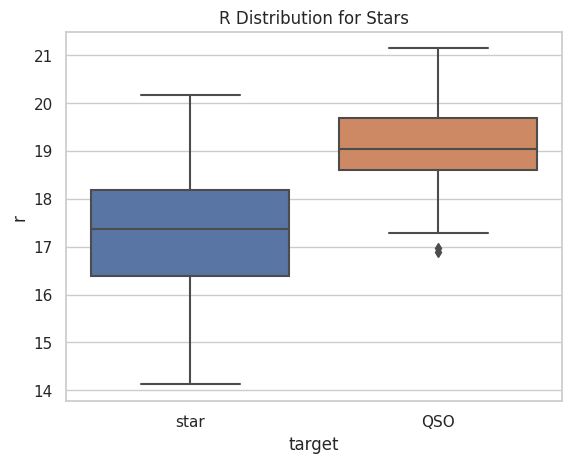

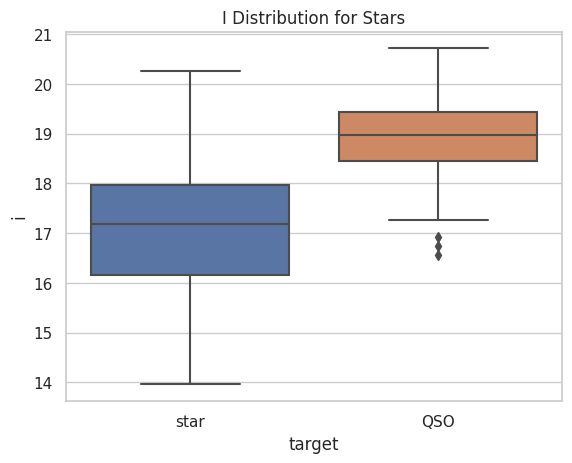

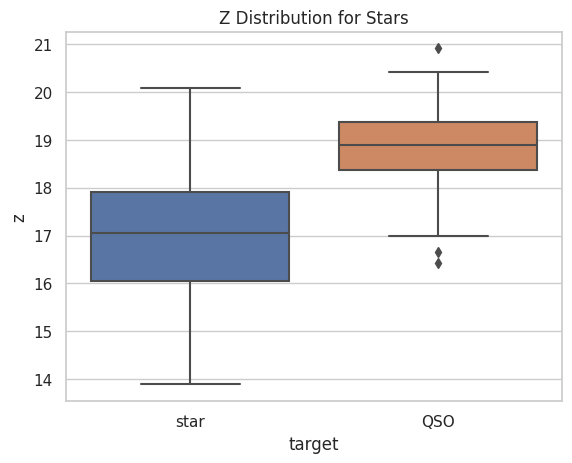

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("sdss_photo.csv")

# Look for trends using pairplot
sns.pairplot(df, hue='target')
plt.show()

# Visualize data distribution
sns.set(style="whitegrid")
attributes = ['u', 'g', 'r', 'i', 'z']
for attribute in attributes:
    sns.boxplot(x='target', y=attribute, data=df)
    plt.title(f'{attribute.upper()} Distribution for Stars')
    plt.show()

### **ML SDSS**

In [26]:
history = [{"role":"system","content":"You are a helpful assistant"}]

data = pd.read_csv("sdss_photo.csv").round(1)[::100].to_string()
question = f'For the following data, generate Python code that divides them into training and testing data and applies ensemble of scikit learn classification methods. At the end, also test the accuracy of prediction and produce confusion matrix and ROC curve:\n\n"""\n{data}\n"""'

history.append({"role":"user","content":question})

# Ask GPT-4 for an answer
completion = openai.ChatCompletion.create(
    model="gpt-4",
    messages=history
)
reply_content = completion.choices[0].message.content.strip("\n")

# Add the answer to the history
history.append({"role":"assistant","content":reply_content})

print()
print(reply_content)


```python
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt

data = """
u     g     r     i     z target
0    19.2  17.5  16.8  16.6  16.5   star
100  19.3  18.3  18.2  18.2  18.2   star
200  19.2  17.6  17.0  16.8  16.7   star
300  18.4  17.5  17.4  17.4  17.4   star
400  20.5  18.4  17.4  17.1  16.9   star
500  19.1  17.7  17.2  17.0  16.9   star
600  23.5  20.3  19.4  18.9  18.6   star
700  20.6  20.4  20.1  20.3  20.3    QSO
800  19.4  19.2  19.1  19.0  18.7    QSO
"""

# Load data to a pandas dataframe and drop index
df = pd.read_csv(pd.StringIO(data), sep='\s+')

# Split data into training and testing sets
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_

Test set accuracy: 0.954
Confusion matrix: 
 [[ 57   7]
 [  5 192]]


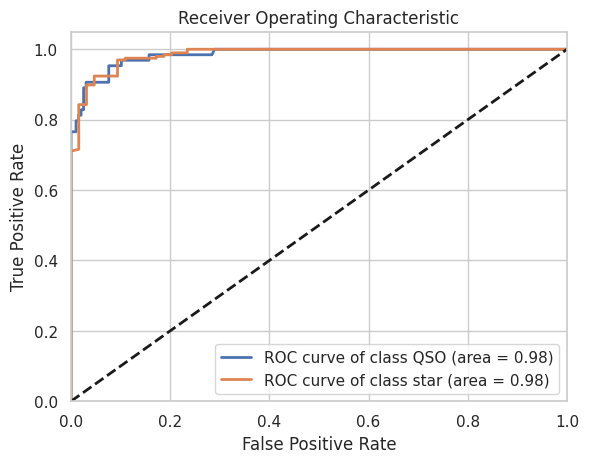

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt

data = pd.read_csv("sdss_photo.csv")

# Split data into training and testing sets
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Label encoding target
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Ensemble classifiers
rf = RandomForestClassifier(n_estimators=100)
gb = GradientBoostingClassifier()
clf = VotingClassifier(estimators=[('rf', rf), ('gb', gb)], voting='soft')
clf.fit(X_train, y_train_encoded)

# Prediction and accuracy
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f'Test set accuracy: {accuracy:.3f}')

# Confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred)
print('Confusion matrix: \n', cm)

# ROC curve
y_score = clf.predict_proba(X_test)
n_classes = len(le.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()

ovr_clf = OneVsRestClassifier(clf)
y_test_ovr = ovr_clf.fit(X_train, y_train_encoded).predict_proba(X_test)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_encoded == i, y_test_ovr[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

lw = 2

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw, label=f'ROC curve of class {le.inverse_transform([i])[0]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC_curve.png')
plt.show()

### **Generate fake gamma ray curves**

In [2]:
history = [{"role":"system","content":"You are a helpful assistant"}]

question = f'Generate Python code that randomly generates artificial light curves of gamma ray bursts in 4 different energy bands. \
Generate following types of bursts: long and chaotic subbursts, subsecond isolated spikes, Fast Rise-Exponential Decay profile'

history.append({"role":"user","content":question})

# Ask GPT-4 for an answer
completion = openai.ChatCompletion.create(
    model="gpt-4",
    messages=history
)
reply_content = completion.choices[0].message.content.strip("\n")

# Add the answer to the history
history.append({"role":"assistant","content":reply_content})

print()
print(reply_content)


To create artificial light curves of gamma-ray bursts in Python, we can use the NumPy and Matplotlib libraries. Here, we generate light curves for three different types of gamma-ray bursts:

1. Long and chaotic subbursts.
2. Subsecond isolated spikes.
3. Fast Rise-Exponential Decay profile.

```python
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit

def generate_long_chaotic_subbursts(duration, num_subbursts, num_points, energy_bands):
    light_curves = []

    for band in range(energy_bands):
        time = np.linspace(0, duration, num_points)
        signal = np.zeros(num_points)

        for _ in range(num_subbursts):
            subburst_duration = np.random.uniform(0.5, 3)
            subburst_start = np.random.uniform(0, duration - subburst_duration)
            subburst_amplitude = np.random.uniform(1, 20)

            t_sub = np.arange(subburst_start, subburst_start + subburst_duration, duration/num_points)
            y_sub = subburst_ampli

### **Classify curves with LSTM**

In [16]:
history = [{"role":"system","content":"You are a helpful assistant"}]

question = f'Generate Python code that randomly generates artificial light curves of gamma ray bursts in 4 different energy bands. \
Energy ranges for individual energy bands are 70-110 keV, 110-370 keV, 370-630 keV, and 630-890 keV. \
For the intensities in individual energy bands, assume powerlaw energy distribution with powerlaw index of -1.5. \
Generate the shape of gamma ray bursts as instant rise and fast exponential decay and also add constant background. \
Add Poisson noise to both generated gamma ray bursts and background. \
Plot exemplary light curves into a figure with 25 subplots.'
# Split the data into training, testing, and validation data. \
# Propose and apply a lstm architecture that performs classification of these light curves into two classes: with bursts and without bursts. \
#Test the performance of the network using confusion matrix and a ROC curve.'

history.append({"role":"user","content":question})

# Ask GPT-4 for an answer
completion = openai.ChatCompletion.create(
    model="gpt-4",
    messages=history
)
reply_content = completion.choices[0].message.content.strip("\n")

# Add the answer to the history
history.append({"role":"assistant","content":reply_content})

print()
print(reply_content)


To implement this, I'm using the numpy and matplotlib libraries. Make sure you have them installed in your Python environment before running the code:

```bash
pip install numpy matplotlib
```

Below is the Python code that achieves the mentioned requirements:

```python
import numpy as np
import matplotlib.pyplot as plt

def generate_energy_bands():
    energy_ranges = [(70, 110), (110, 370), (370, 630), (630, 890)]
    energy_bands = []

    for min_energy, max_energy in energy_ranges:
        energy = np.random.uniform(min_energy, max_energy)
        energy_bands.append(energy)

    return energy_bands

def generate_grb_lightcurve(energy_band, powerlaw_index, duration, background, time_bins):
    intensities = np.power(energy_band, powerlaw_index)
    shape = np.concatenate(([1], np.exp(-time_bins / duration)))
    burst_signal = intensities * shape

    poisson_noise = np.random.poisson(lam=background + burst_signal)
    
    return poisson_noise

def plot_lightcurves(grb_lightcur

In [20]:
question = f'ValueError: a must be 1-dimensional'

history.append({"role":"user","content":question})

# Ask GPT-4 for an answer
completion = openai.ChatCompletion.create(
    model="gpt-4",
    messages=history
)
reply_content = completion.choices[0].message.content.strip("\n")

# Add the answer to the history
history.append({"role":"assistant","content":reply_content})

print()
print(reply_content)


Apologies for the mistake. To fix this error, I'll modify the selection of a random energy range by converting the list of tuples to a 1-dimensional numpy array. Here's the updated code:

```python
import numpy as np
import matplotlib.pyplot as plt

def generate_energy_band(energy_range):
    min_energy, max_energy = energy_range
    energy_band = np.random.uniform(min_energy, max_energy)

    return energy_band

def generate_grb_lightcurve(energy_band, powerlaw_index, duration, background, time_bins):
    intensities = np.power(energy_band, powerlaw_index)
    shape = np.concatenate(([1], np.exp(-time_bins[1:] / duration)))
    burst_signal = intensities * shape

    poisson_noise = np.random.poisson(lam=background + burst_signal)
    
    return poisson_noise

def plot_lightcurves(grb_lightcurves):
    fig, axes = plt.subplots(5, 5, figsize=(16, 12), constrained_layout=True)

    for i, ax in enumerate(axes.flatten()):
        ax.plot(grb_lightcurves[i], linewidth=1.5)
        ax.se

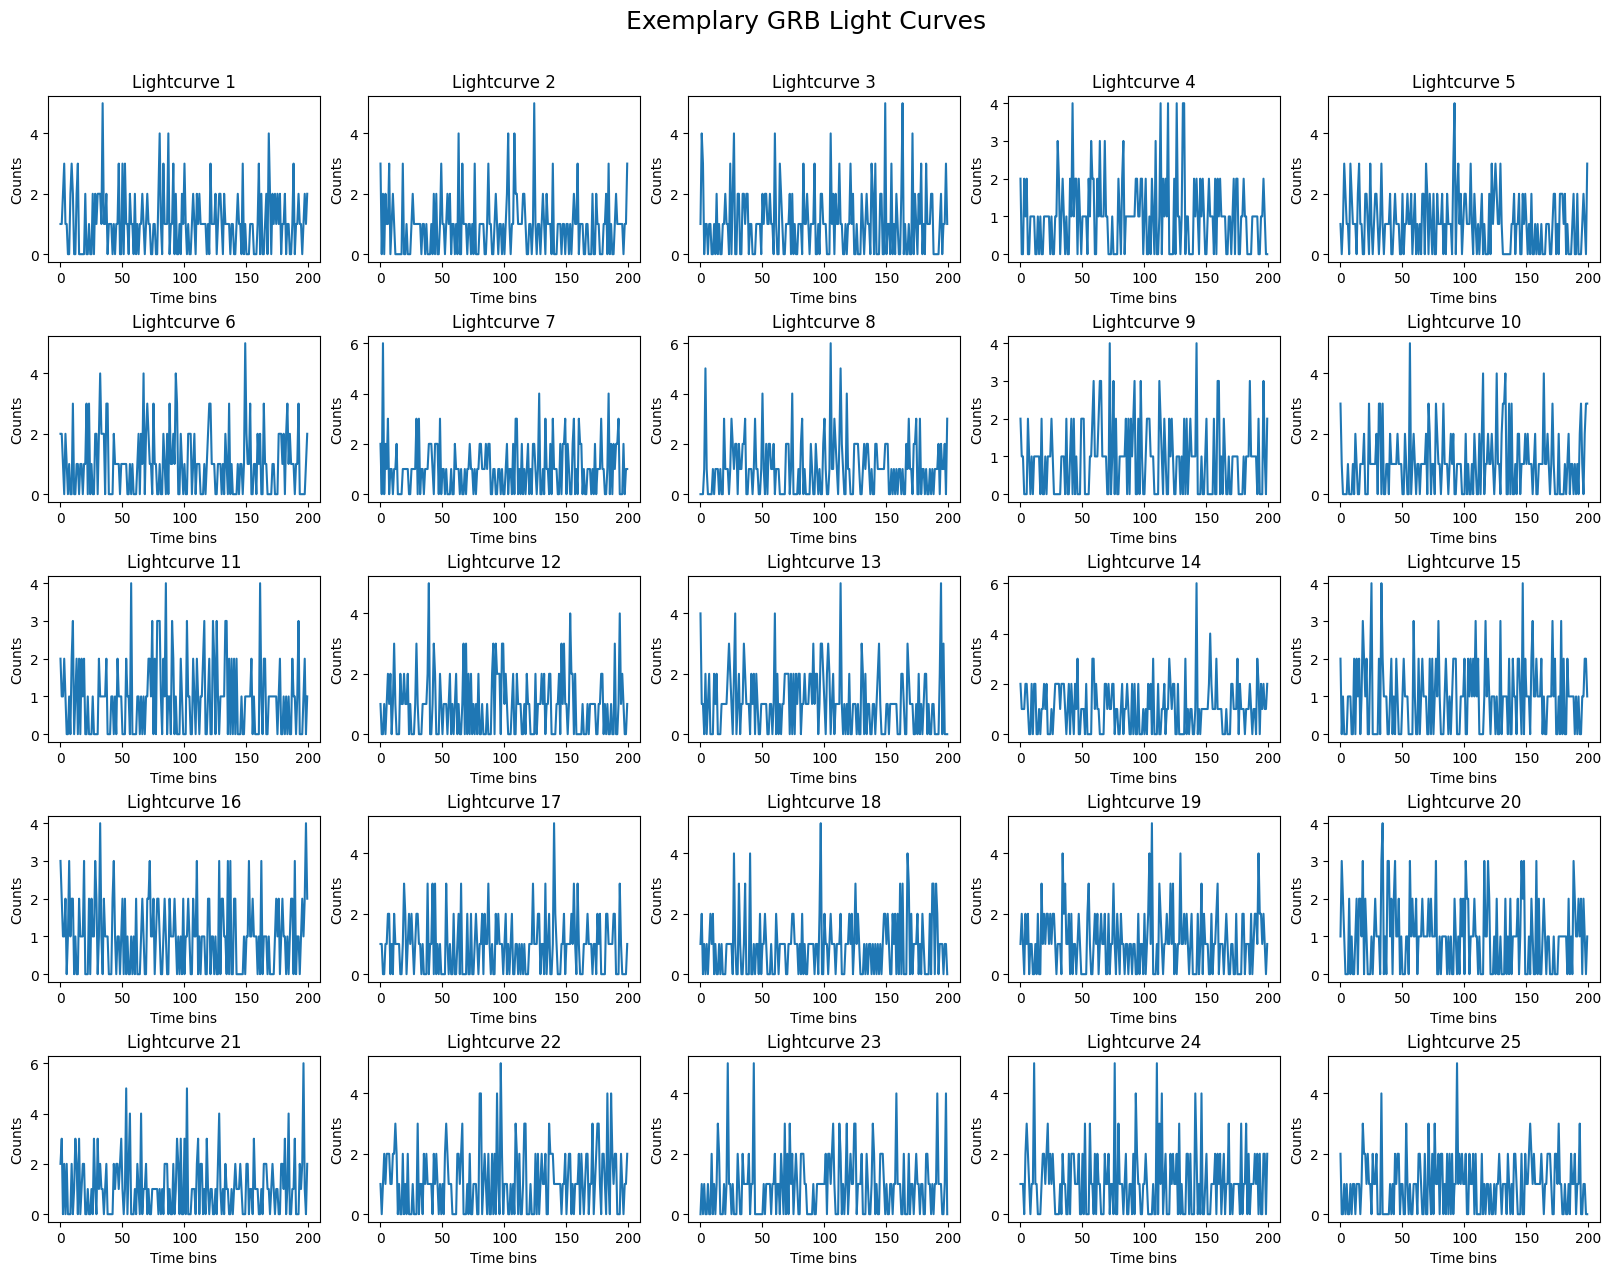

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def generate_energy_band(energy_range):
    min_energy, max_energy = energy_range
    energy_band = np.random.uniform(min_energy, max_energy)

    return energy_band

def generate_grb_lightcurve(energy_band, powerlaw_index, duration, background, time_bins):
    intensities = np.power(energy_band, powerlaw_index)
    shape = np.concatenate(([1], np.exp(-time_bins[1:] / duration)))
    burst_signal = intensities * shape

    poisson_noise = np.random.poisson(lam=background + burst_signal)
    
    return poisson_noise

def plot_lightcurves(grb_lightcurves):
    fig, axes = plt.subplots(5, 5, figsize=(16, 12), constrained_layout=True)

    for i, ax in enumerate(axes.flatten()):
        ax.plot(grb_lightcurves[i], linewidth=1.5)
        ax.set_xlabel('Time bins')
        ax.set_ylabel('Counts')
        ax.set_title(f'Lightcurve {i+1}')

    plt.suptitle("Exemplary GRB Light Curves", fontsize=18, y=1.05)
    plt.show()

if __name__ == "__main__":
    energy_ranges = np.array([(70, 110), (110, 370), (370, 630), (630, 890)])
    powerlaw_index = -1.5
    duration = 100
    background = 1
    time_bins = np.arange(200)

    grb_lightcurves = []
    for _ in range(25):
        energy_range = energy_ranges[np.random.choice(len(energy_ranges))]
        energy_band = generate_energy_band(energy_range=energy_range)
        lightcurve = generate_grb_lightcurve(
            energy_band=energy_band,
            powerlaw_index=powerlaw_index,
            duration=duration,
            background=background,
            time_bins=time_bins
        )
        grb_lightcurves.append(lightcurve)

    plot_lightcurves(grb_lightcurves)

In [9]:
b.shape

(100, 100)

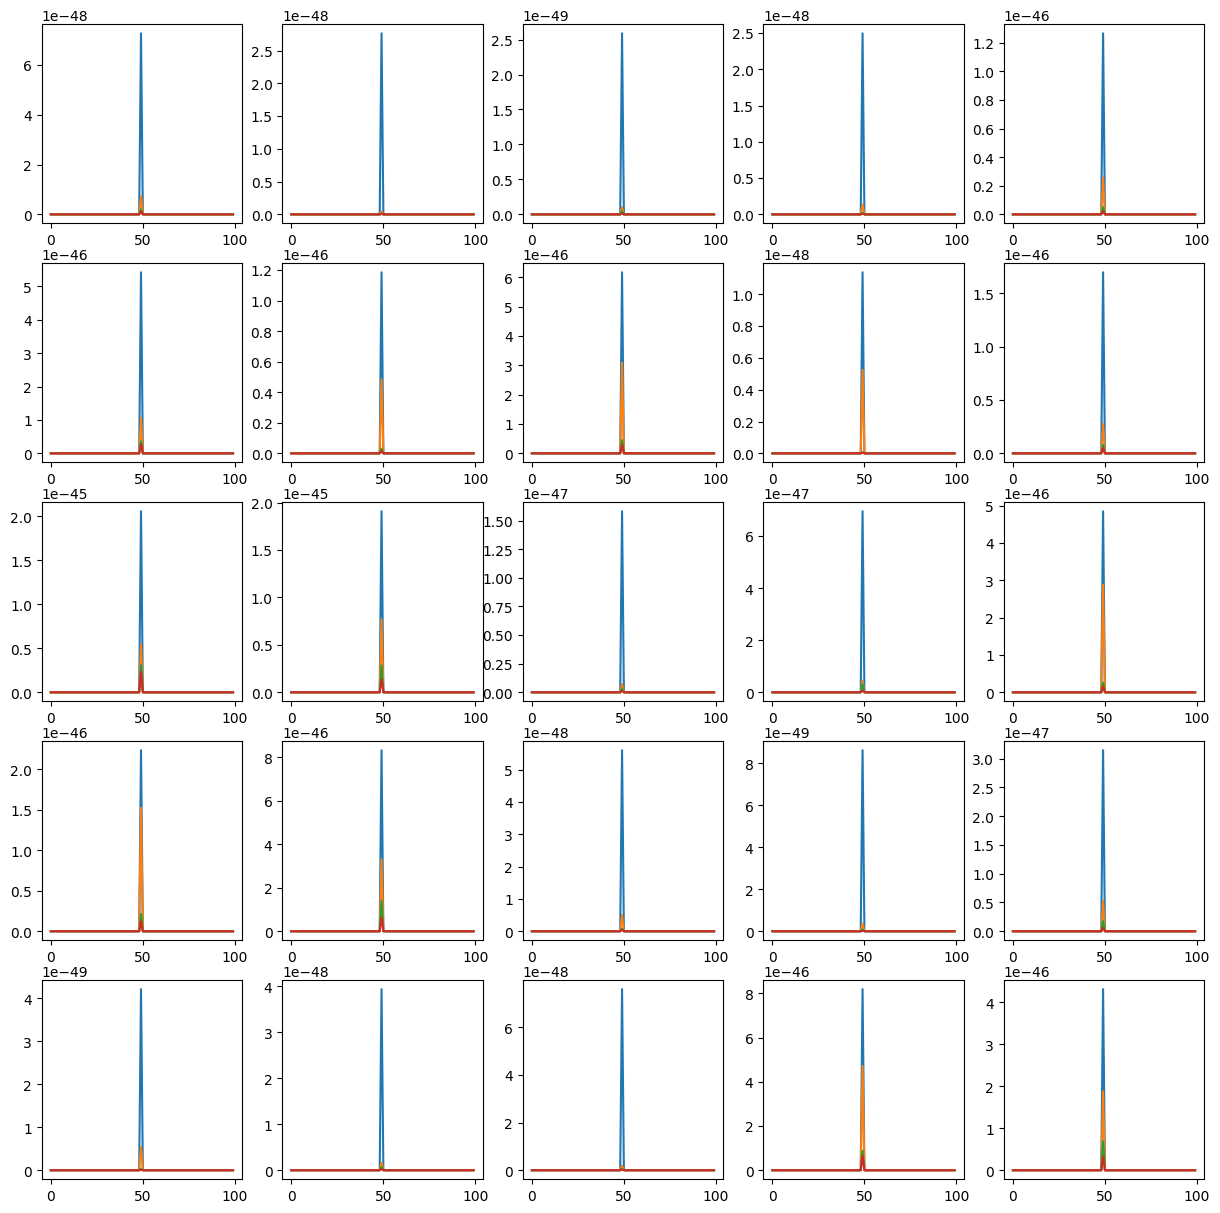

2023-05-04 22:05:57.585626: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-04 22:05:57.586683: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-04 22:05:57.587711: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/25


2023-05-04 22:05:57.942618: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-04 22:05:57.944700: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-04 22:05:57.946000: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

KeyboardInterrupt: 

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# Step 1: Generate artificial light curves of gamma-ray bursts
def generate_light_curve(powerlaw_index, energy_band, n_points=100):
    shape = np.zeros(n_points)
    shape[49] = 1
    signal = np.exp(-np.arange(n_points)/0.5) * shape
    signal *= np.power(energy_band, powerlaw_index)
    return signal

np.random.seed(42)
n_samples = 500
n_points = 100
energy_bands = [(70, 110), (110, 370), (370, 630), (630, 890)]

light_curves = []
labels = []

for i in range(n_samples):
    light_curve = np.zeros((n_points, len(energy_bands)))
    label = 0
    
    # Generate data with bursts for half of the samples
    if i < n_samples // 2:
        label = 1
        powerlaw_index = np.random.uniform(-3, -1)
        
        for j, energy_band in enumerate(energy_bands):
            energy = np.random.uniform(energy_band[0], energy_band[1])
            light_curve[:, j] = generate_light_curve(powerlaw_index, energy)
    
    light_curves.append(light_curve)
    labels.append(label)

light_curves = np.array(light_curves)
labels = np.array(labels)

# Plot exemplary light curves
fig, ax = plt.subplots(5, 5, figsize=(15, 15))
for i in range(25):
    ax[i // 5, i % 5].plot(light_curves[i])

plt.show()

# Step 2: Split data into training, testing, and validation sets
x_train, x_test, y_train, y_test = train_test_split(light_curves, labels, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42)

# Step 3: Create and train an LSTM architecture
model = Sequential()
model.add(LSTM(64, input_shape=(n_points, len(energy_bands)), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=25, batch_size=64, validation_data=(x_val, y_val))

# Step 4: Evaluate the network's performance using a confusion matrix and ROC curve
y_pred = (model.predict(x_test) > 0.5).astype(int)
y_pred_prob = model.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)

# Calculate the false positive rate (FPR) and true positive rate (TPR) for the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [10]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical

In [2]:
def generate_fast_rise_exponential_decay(duration, num_points, energy_bands):
    light_curves = []

    for band in range(energy_bands):
        time = np.linspace(0, duration, num_points)
        amplitude = np.random.uniform(1, 20)

        t_rise = np.random.uniform(0.05, 0.3)
        t_decay = np.random.uniform(2, 8)

        signal = t_rise * amplitude * time * expit(-(time - t_rise)/t_decay) * np.exp(-time/t_decay)

        light_curves.append(signal)

    return time, light_curves


def generate_light_curves(n_samples, seq_length, n_bands=4, gamma_ray_burst_prob=0.5):
    artificial_data = []
    labels = []

    for _ in range(n_samples):
        lc = np.random.randn(seq_length, n_bands)
        is_burst = np.random.rand() < gamma_ray_burst_prob

        if is_burst:
            burst_start = np.random.randint(seq_length // 4, seq_length * 3 // 4)
            burst_duration = np.random.randint(1, seq_length // 4)
            burst_amplitude = np.random.rand(n_bands) * 5 + 2

            for i in range(burst_duration):
                lc[burst_start + i] += burst_amplitude

        artificial_data.append(lc)
        labels.append(is_burst)

    return np.array(artificial_data), np.array(labels, dtype=int)

In [3]:
n_samples = 10000
seq_length = 50

X, y = generate_light_curves(n_samples, seq_length)
# y = to_categorical(y)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp)

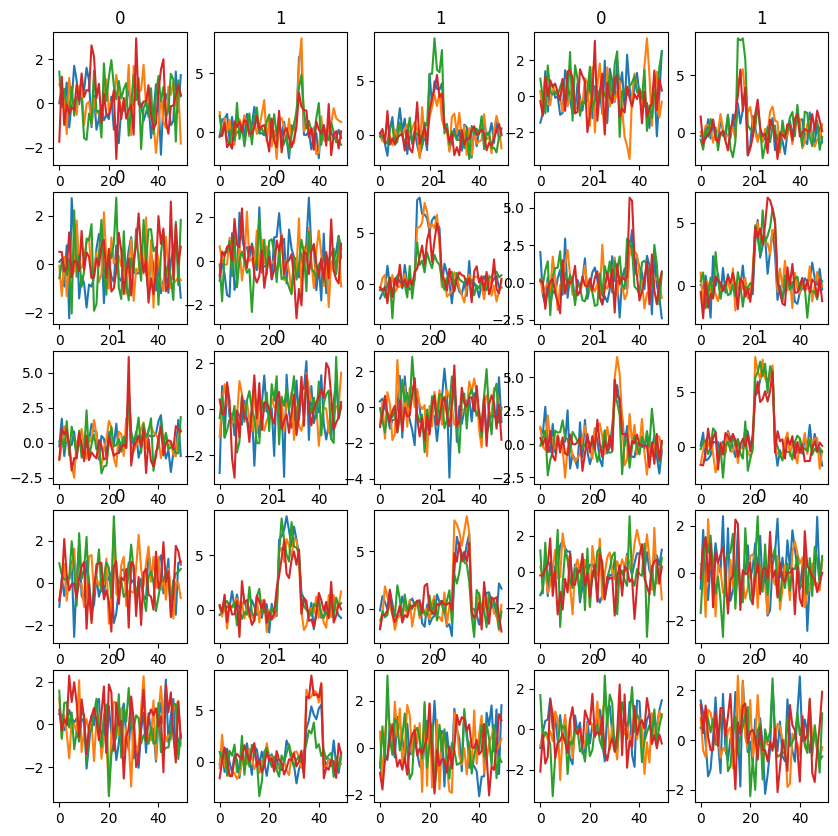

In [15]:
fig, axs = plt.subplots(5,5, figsize=(10,10))

x = 0
for i in range(5):
    for j in range(5):
        ax = axs[i,j]
        
        ax.set_title(y_train[x])
        ax.plot(X_train[x])
        
        x += 1

In [4]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(seq_length, 4)))
model.add(Dropout(0.4))
model.add(LSTM(32))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
model.summary()

2023-05-04 20:57:40.813702: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-04 20:57:40.859999: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-05-04 20:57:41.153374: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gra

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 64)            17664     
                                                                 
 dropout (Dropout)           (None, 50, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 30,113
Trainable params: 30,113
Non-trainable params: 0
_________________________________________________________________


2023-05-04 20:57:41.420886: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-04 20:57:41.422804: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-04 20:57:41.424274: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [5]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_val, y_val), verbose=1)

Epoch 1/30


2023-05-04 20:57:45.489905: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-04 20:57:45.491499: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-04 20:57:45.492739: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

188/188 [==============================] - ETA: 0s - loss: 0.1468 - accuracy: 0.9455

2023-05-04 20:57:56.265155: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-04 20:57:56.266817: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-04 20:57:56.268093: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

188/188 [==============================] - 12s 48ms/step - loss: 0.1468 - accuracy: 0.9455 - val_loss: 0.0115 - val_accuracy: 0.9985
Epoch 2/30
188/188 [==============================] - 9s 46ms/step - loss: 0.0169 - accuracy: 0.9965 - val_loss: 0.0274 - val_accuracy: 0.9900
Epoch 3/30
188/188 [==============================] - 7s 39ms/step - loss: 0.0068 - accuracy: 0.9987 - val_loss: 0.0070 - val_accuracy: 0.9985
Epoch 4/30
188/188 [==============================] - 9s 47ms/step - loss: 0.0115 - accuracy: 0.9967 - val_loss: 0.0017 - val_accuracy: 0.9990
Epoch 5/30
188/188 [==============================] - 9s 47ms/step - loss: 0.0030 - accuracy: 0.9993 - val_loss: 3.5827e-04 - val_accuracy: 1.0000
Epoch 6/30
188/188 [==============================] - 9s 47ms/step - loss: 0.0021 - accuracy: 0.9997 - val_loss: 7.7781e-04 - val_accuracy: 0.9995
Epoch 7/30
188/188 [==============================] - 9s 47ms/step - loss: 0.0061 - accuracy: 0.9988 - val_loss: 6.5010e-04 - val_accuracy: 1.00

In [7]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

2023-05-04 21:03:21.801747: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-04 21:03:21.803726: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-04 21:03:21.805208: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

63/63 [==============================] - 1s 10ms/step


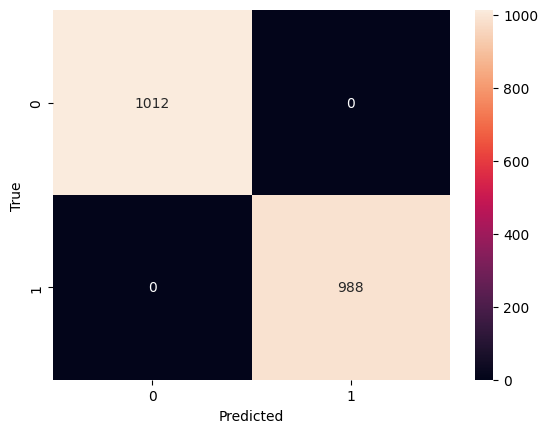

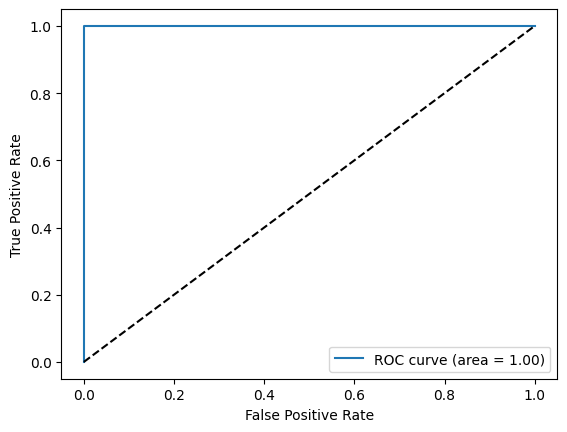

In [11]:
# Evaluate model
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()